In [1]:
!pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 782.3 kB/s eta 0:00:00


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import pypfopt as ppf

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

import matplotlib.pyplot as plt

In [3]:
def fetch_stock_data(tickers, start_date, end_date):
    # Download stock data
    stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return stock_data


In [79]:
tickers = "TSLA GOOG ESTC BAC SBUX KO DIS 005930.KS"
start_date = "2021-01-01"
end_date = "2024-01-19"
stock_data = fetch_stock_data(tickers, start_date, end_date)
market_data = fetch_stock_data('SPY', start_date, end_date).to_frame()
stock_data
market_data

[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04,352.767151
2021-01-05,355.196716
2021-01-06,357.320374
2021-01-07,362.629181
2021-01-08,364.695343
...,...
2024-01-11,476.350006
2024-01-12,476.679993
2024-01-16,474.929993


In [80]:
# Calculate expected returns and sample covariance
# mu = expected_returns.mean_historical_return(prices=stock_data)
# mu = expected_returns.ema_historical_return(prices=stock_data)
mu = expected_returns.capm_return(prices=stock_data, market_prices=market_data, risk_free_rate=0.05)
mu

/usr/local/lib/python3.10/dist-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


005930.KS    0.055550
BAC          0.103978
DIS          0.109598
ESTC         0.158106
GOOG         0.122659
KO           0.075590
SBUX         0.105689
TSLA         0.151813
Name: mkt, dtype: float64

In [81]:
# Sigma = risk_models.risk_matrix(stock_data, method="sample_cov")
Sigma = risk_models.risk_matrix(stock_data, method="ledoit_wolf")
Sigma

,005930.KS,BAC,DIS,ESTC,GOOG,KO,SBUX,TSLA
005930.KS,0.047871,0.006947,0.005588,0.006865,0.003877,-0.000315,0.003320,0.010140
BAC,0.006947,0.078925,0.039785,0.038164,0.027961,0.012996,0.029219,0.045173
DIS,0.005588,0.039785,0.087376,0.068233,0.039640,0.013080,0.037363,0.058885
ESTC,0.006865,0.038164,0.068233,0.381157,0.086860,0.009456,0.059749,0.150036
GOOG,0.003877,0.027961,0.039640,0.086860,0.096916,0.013149,0.035379,0.073600
KO,-0.000315,0.012996,0.013080,0.009456,0.013149,0.027368,0.015282,0.009701
SBUX,0.003320,0.029219,0.037363,0.059749,0.035379,0.015282,0.074510,0.053588
TSLA,0.010140,0.045173,0.058885,0.150036,0.073600,0.009701,0.053588,0.327583


In [82]:
stock_data.corr()

,005930.KS,BAC,DIS,ESTC,GOOG,KO,SBUX,TSLA
005930.KS,1.000000,0.272038,0.649767,0.655756,0.389469,-0.650154,0.521593,0.209156
BAC,0.272038,1.000000,0.654431,0.529517,0.429771,-0.301021,0.226967,0.495888
DIS,0.649767,0.654431,1.000000,0.836526,0.191279,-0.803322,0.452037,0.280108
ESTC,0.655756,0.529517,0.836526,1.000000,0.432952,-0.782403,0.475602,0.414026
GOOG,0.389469,0.429771,0.191279,0.432952,1.000000,-0.055500,0.218684,0.577423
KO,-0.650154,-0.301021,-0.803322,-0.782403,-0.055500,1.000000,-0.419373,-0.154351
SBUX,0.521593,0.226967,0.452037,0.475602,0.218684,-0.419373,1.000000,-0.170048
TSLA,0.209156,0.495888,0.280108,0.414026,0.577423,-0.154351,-0.170048,1.000000


<Axes: >

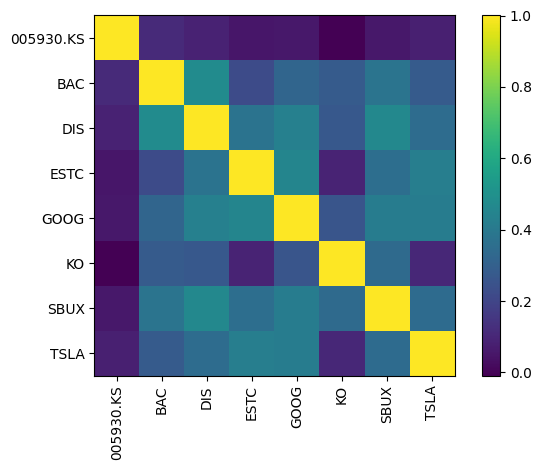

In [83]:
plotting.plot_covariance(Sigma, plot_correlation=True)

In [84]:
### Compute Minimum Variance Portfolio using PyPortfolioOpt
# Create an EfficientFrontier object
# ef = EfficientFrontier(mu, Sigma)
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0.0,0.40))
# Calculate the minimum volatility portfolio weights
# raw_weights = ef.min_volatility()
# raw_weights = ef.portfolio_performance()
raw_weights = ef.efficient_risk(0.3)
raw_weights

cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('005930.KS', 0.0),
             ('BAC', 0.13536),
             ('DIS', 0.06148),
             ('ESTC', 0.1748),
             ('GOOG', 0.39969),
             ('KO', 0.0),
             ('SBUX', 0.0381),
             ('TSLA', 0.19056)])

In [85]:
ef.portfolio_performance(verbose=True)

Expected annual return: 13.0%
Annual volatility: 30.0%
Sharpe Ratio: 0.37


(0.13043244525232678, 0.2999999998229987, 0.36810815105827466)

<Axes: >

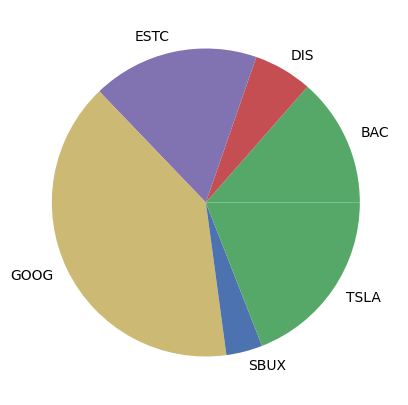

In [86]:
pd.Series(cleaned_weights).plot.pie(figsize=(5,5))

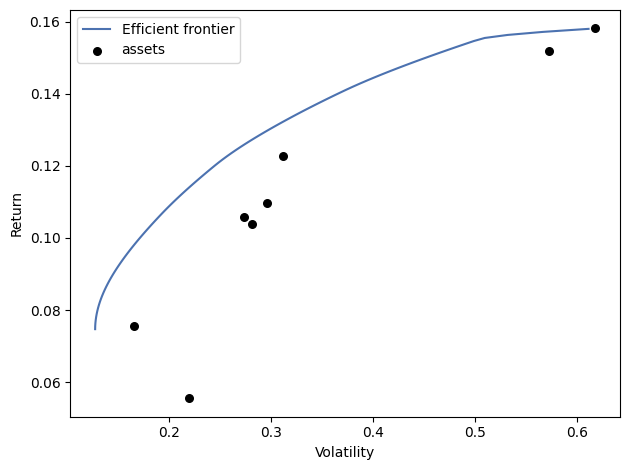

In [87]:
### Plot the Efficient Frontier (Bugfix)
### Change plt.style.use("seaborn-deep") to plt.style.use("seaborn-v0_8-deep") at line 21 of plotting.py
### You can find plotting.py in "~/venv/yourenvname/lib/python3.10/site-packages/pypfopt"

import matplotlib.pyplot as plt
from pypfopt import plotting

ef = EfficientFrontier(mu, Sigma)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()